In [4]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import string
# 
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!gdown --id 1Pjr69ChG81L2KEQLPs-dA6eW4RUCkBsD
!unzip PA4_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1Pjr69ChG81L2KEQLPs-dA6eW4RUCkBsD
To: /content/PA4_dataset.zip
100% 322k/322k [00:00<00:00, 46.2MB/s]
Archive:  PA4_dataset.zip
replace PA4_dataset/stop_words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Part 1

In the data preprocessing task i also used **stemming and lemmetization** to increase the accuracy of the model

In [5]:
# importing
df = pd.read_csv('/content/PA4_dataset/train.csv')
df_test = pd.read_csv('/content/PA4_dataset/test.csv')
df.head()

Sentiment                                              Tweet
0   neutral  @united to be clear on my luggage comment, I a...
1  positive                     @united I wanna be grand staff
2  negative  @united. DAY to IAD and CVG to IAD both Cancel...
3  positive                              @JetBlue Looking cool
4  negative  @USAirways disappointment? Making own arrangem...

In [6]:
# hyperlink, username, puntuation, lower, truncate
upd = [re.sub(r'(http\S+)|(@[A-Za-z0-9]+)|([!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~])|([^A-Za-z\s]+)','',t).lower().strip() for t in df.Tweet]
upd_test = [re.sub(r'(http\S+)|(@[A-Za-z0-9]+)|([!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~])|([^A-Za-z\s]+)','',t).lower().strip() for t in df_test.Tweet]
# stopwords
s_w = open("/content/PA4_dataset/stop_words.txt", "r")
stop_words = [line.split('\n')[0] for line in s_w.readlines()]
# stemming and lematization
df.Tweet = [' '.join([ps.stem(lemmatizer.lemmatize(word)) for word in tweet.split() if word not in stop_words]) for tweet in upd]
df_test.Tweet = [' '.join([ps.stem(lemmatizer.lemmatize(word)) for word in tweet.split() if word not in stop_words]) for tweet in upd_test]

# Part 2

In [7]:
# making vocab
lol = [x.split() for x in df.Tweet.to_numpy()]
vocab = np.unique(np.array([y for x in lol for y in x])).tolist()

In [8]:
# initializing
counts = np.zeros((len(df),len(vocab)))
counts_test = np.zeros((len(df_test),len(vocab)))

In [9]:
# making bag of words
for i,t in enumerate(df.Tweet.to_numpy()):
  for w in t.split():
    counts[i][vocab.index(w)] += 1
for i,t in enumerate(df_test.Tweet.to_numpy()):
  for w in t.split():
    if w not in vocab:
      continue
    counts_test[i][vocab.index(w)] += 1

In [10]:
bow = pd.DataFrame(counts,columns=vocab)
# bow['Sentiment'] = df['Sentiment']
bow.head()

aa  aaaand  aaadvantag  aaba  ...  zone  zoom  zurich  zurichnew
0  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
1  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
2  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
3  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
4  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0

[5 rows x 5933 columns]

In [11]:
bow_test = pd.DataFrame(counts_test,columns=vocab)
# bow_test['Sentiment'] = df_test['Sentiment']
bow_test.head()

aa  aaaand  aaadvantag  aaba  ...  zone  zoom  zurich  zurichnew
0  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
1  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
2  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
3  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0
4  0.0     0.0         0.0   0.0  ...   0.0   0.0     0.0        0.0

[5 rows x 5933 columns]

In [12]:
# making X_train and X_test data sets

train_neu = df.Sentiment.copy().replace('neutral',1).replace(['positive','negative'],0)
train_pos = df.Sentiment.copy().replace('positive',1).replace(['neutral','negative'],0)
train_neg = df.Sentiment.copy().replace('negative',1).replace(['positive','neutral'],0)

test_neu = df_test.Sentiment.copy().replace('neutral',1).replace(['positive','negative'],0)
test_pos = df_test.Sentiment.copy().replace('positive',1).replace(['neutral','negative'],0)
test_neg = df_test.Sentiment.copy().replace('negative',1).replace(['positive','neutral'],0)

In [13]:
# making y_train and y_test
y_train = df.Sentiment.copy().replace(['neutral','positive','negative'],[0,1,-1])
y_test = df_test.Sentiment.copy().replace(['neutral','positive','negative'],[0,1,-1])

# Part 3

50.0% 100.0% 

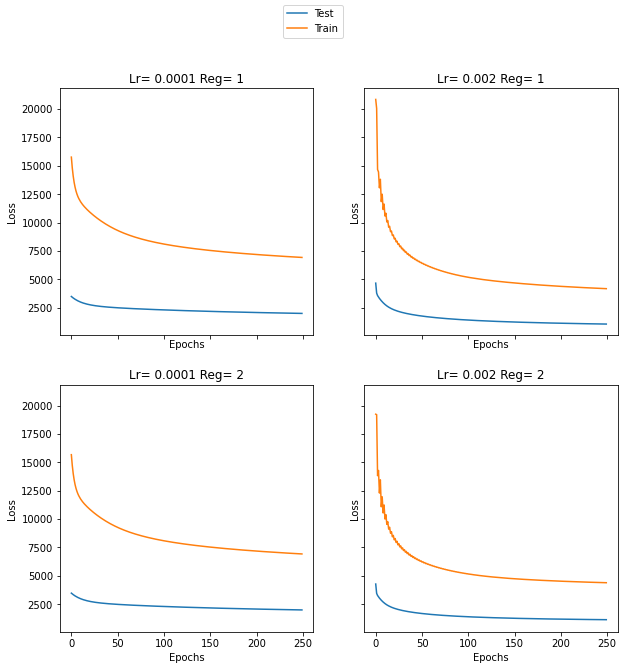

In [15]:
# making the logistic model
def predict(data, theta0, thetas, y, lr1,epoch,lr):
  loss = np.zeros(epoch)
  probs = np.ones(len(data)).astype(float)
  for e in range(epoch):
    for i,x in enumerate(data):
      # predicting
      probs[i] = (1.0/(1+np.exp(-(theta0 + np.dot(x,thetas)))))

    # calculating loss
    loss[e] = -np.sum(y * np.log(probs) + ((1 - y) * np.log(1 - probs)))

    # gradient descent
    theta0 = theta0 - (lr1*np.sum((probs - y)) + lr1*lr*theta0)
    for t in range(len(thetas)):
      thetas[t] = thetas[t] - (lr1*np.sum((probs - y)*data[:,t]) + lr1*lr*thetas[t])
  return np.array(loss), probs

# taking two diffent values of lr and regularization to get the best hyper parameters

probs_train = []
probs_test = []
figure, ax = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)
for i,regularization in enumerate([1,2]):
  for j,lr in enumerate([0.0001, 0.002]):
    # for this case setting epochs to 250
    epochs = 250

    losses_train = np.zeros(epochs)
    thetas = np.zeros(len(bow.columns)).astype(float)
    theta0 = 0.0
    X_train = bow.to_numpy()
    for x in [train_neu,train_pos,train_neg]:
      y_train = x.to_numpy()
      l_train, p_train = predict(X_train, theta0, thetas, y_train, lr, epochs, regularization)
      probs_train.append(p_train)
      losses_train += l_train
    
    losses_test = np.zeros(epochs)
    thetas_test = np.zeros(len(bow_test.columns)).astype(float)
    theta0_test = 0.0
    X_test = bow_test.to_numpy()
    for x in [test_neu,test_pos,test_neg]:
      y_test = x.to_numpy()
      l_test, p_test = predict(X_test, theta0_test, thetas_test, y_test, lr, epochs, regularization)
      probs_test.append(p_test)
      losses_test += l_test

    ax[i,j].title.set_text('Lr= '+str(lr)+' Reg= '+str(regularization))
    ax[i,j].set_xlabel('Epochs')
    ax[i,j].set_ylabel('Loss')
    ax[i,j].plot(losses_test)
    ax[i,j].plot(losses_train)
  print(str(((i+1)/2)*100)+'%',end=' ')
figure.legend(['Test','Train'],loc=9)
plt.show()

In [17]:
# By looking at the loss the best model is the one with lr = 0.002 and reg = 1

# Training the best model for 1000 epochs
probs_train = []
probs_test = []

epochs = 1000
lr = 0.002
regularization = 1
thetas = np.zeros(len(bow.columns)).astype(float)
theta0 = 0.0
X_train = bow.to_numpy()

for ii,x in enumerate([train_neu,train_pos,train_neg]):
  y_train = x.to_numpy()
  l_train, p_train = predict(X_train, theta0, thetas, y_train, lr, epochs, regularization)
  probs_train.append(p_train)
  print(ii/6)
  # losses_train += l_train

losses_test = np.zeros(epochs)
thetas_test = np.zeros(len(bow_test.columns)).astype(float)
theta0_test = 0.0
X_test = bow_test.to_numpy()
for ii,x in enumerate([test_neu,test_pos,test_neg]):
  y_test = x.to_numpy()
  l_test, p_test = predict(X_test, theta0_test, thetas_test, y_test, lr, epochs, regularization)
  probs_test.append(p_test)
  print(ii/6)
  # losses_test += l_test

0.0
0.16666666666666666
0.3333333333333333
0.0
0.16666666666666666
0.3333333333333333


In [21]:
# saving files in case colab crashes

df1 = pd.DataFrame()
df2 = pd.DataFrame()
for x in range(len(probs_train)):
  df1[str(x)] = probs_train[x]
  df2[str(x)] = probs_test[x]
  
df1.to_csv('Probs_train.csv')
df2.to_csv('Probs_test.csv')

In [23]:
# using the predicted probabilities to assign classes for train

y_pred = np.zeros((len(y_train)))
for y in range(len(y_train)):
  pred = max(probs_train[0][y],probs_train[1][y],probs_train[2][y])
  if pred == probs_train[0][y]:
    y_pred[y] = 0
  elif pred == probs_train[1][y]:
    y_pred[y] = 1
  elif pred == probs_train[2][y]:
    y_pred[y] = -1

In [26]:
# using the predicted probabilities to assign classes for test

y_pred_test = np.zeros((len(y_test)))
for y in range(len(y_test)):
  pred = max(probs_test[0][y],probs_test[1][y],probs_test[2][y])
  if pred == probs_test[0][y]:
    y_pred_test[y] = 0
  elif pred == probs_test[1][y]:
    y_pred_test[y] = 1
  elif pred == probs_test[2][y]:
    y_pred_test[y] = -1

In [20]:
# function to calculate accuracy

def acc(y,pred):
  return sum(y==pred)/len(y)

In [21]:
# function to calculate confusion matrix and f1-score

def conf_mat(y,pred):
  d = pd.DataFrame(y)
  d['test'] = pred
  tp_neu = len(d[(d.Sentiment == 0) & (d.test == 0)])
  fp_neu = len(d[(d.Sentiment != 0) & (d.test == 0)])
  tn_neu = len(d[(d.Sentiment != 0) & (d.test != 0)])
  fn_neu = len(d[(d.Sentiment == 0) & (d.test != 0)])

  tp_pos = len(d[(d.Sentiment == 1) & (d.test == 1)])
  fp_pos = len(d[(d.Sentiment != 1) & (d.test == 1)])
  tn_pos = len(d[(d.Sentiment != 1) & (d.test != 1)])
  fn_pos = len(d[(d.Sentiment == 1) & (d.test != 1)])

  tp_neg = len(d[(d.Sentiment == -1) & (d.test == -1)])
  fp_neg = len(d[(d.Sentiment != -1) & (d.test == -1)])
  tn_neg = len(d[(d.Sentiment != -1) & (d.test != -1)])
  fn_neg = len(d[(d.Sentiment == -1) & (d.test != -1)])

  p1 = tp_neu/(tp_neu+fp_neu)
  p2 = tp_pos/(tp_pos+fp_pos)
  p3 = tp_neg/(tp_neg+fp_neg)

  r1 = tp_neu/(tp_neu+fn_neu)
  r2 = tp_pos/(tp_pos+fn_pos)
  r3 = tp_neg/(tp_neg+fn_neg)

  p = (p1+p2+p3)/3
  r = (r1+r2+r3)/3
  f1 = 2*(p*r)/(p+r)
  print('F1-score is',f1)
  print('Confusion Matrix')
  print('Neutal')
  conf = [tp_neu, fp_neu, fn_neu, tn_neu]
  print(conf)
  print('Positive')
  conf = [tp_pos, fp_pos, fn_pos, tn_pos]
  print(conf)
  print('Negative')
  conf = [tp_neg, fp_neg, fn_neg, tn_neg]
  print(conf)

In [38]:
# printing Accuracy, F1-score and Confusion matrix for train data
print('Train Data')
print('Accuracy:',acc(y_train, y_pred))
conf_mat(y_train, y_pred)
print()

# printing Accuracy, F1-score and Confusion matrix for test data

print('Test Data')
print('Accuracy:',acc(y_test, y_pred_test))
conf_mat(y_test, y_pred_test)

Train Data
Accuracy: 0.9168374316939891
F1-score is 0.8918912830340221
Confusion Matrix
Neutal
[1054, 144, 234, 4424]
Positive
[802, 82, 146, 4826]
Negative
[3513, 261, 107, 1975]

Test Data
Accuracy: 0.9398907103825137
F1-score is 0.9234894449055281
Confusion Matrix
Neutal
[249, 17, 52, 1146]
Positive
[217, 12, 22, 1213]
Negative
[910, 59, 14, 481]


# Part 4

In [68]:
Multiclass_model = LogisticRegression(multi_class='ovr',tol=0.002,C=2)
#fit model
Multiclass_model.fit(bow.values, y_train)
#make final predictions
y_pred = Multiclass_model.predict(bow_test.values)
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred),sep='\n')
print('F1 score:',f1_score(y_test, y_pred,average='macro'))

Accuracy: 0.7609289617486339
Confusion Matrix:
[[809  87  28]
 [118 157  26]
 [ 50  41 148]]
F1 score: 0.6860563250753843


# Part 5

In [36]:
# finding the probability of each class
total_docs = len(df.Sentiment)
pofneu = df.Sentiment[df.Sentiment=="neutral"].count()/total_docs
pofpos = df.Sentiment[df.Sentiment=="positive"].count()/total_docs
pofneg = df.Sentiment[df.Sentiment=="negative"].count()/total_docs
print(pofneu,pofpos,pofneg)

0.21994535519125682 0.16188524590163936 0.6181693989071039


In [58]:
# Training the Na¨ıve Bayes Classifier

# calculating the count of each word
bow_part2 = bow.copy()
bow_part2['Sentiment'] = df.Sentiment
w_c = bow_part2.groupby('Sentiment').sum().transpose()
w_c = w_c[['neutral','positive','negative']]
w_c.head(10)

Sentiment   neutral  positive  negative
aa             33.0       8.0      76.0
aaaand          0.0       0.0       1.0
aaadvantag      0.0       0.0       1.0
aaba            1.0       0.0       0.0
aadavantag      1.0       0.0       0.0
aadelay         0.0       0.0       1.0
aadfw           0.0       2.0       0.0
aadv            0.0       0.0       1.0
aadvantag       2.0       0.0       2.0
aafail          0.0       0.0       2.0

In [59]:
# Training the Na¨ıve Bayes Classifier

# counting the probability of each word given class
wpneu=[]
wppos=[]
wpneg=[]
len_vocab = len(vocab)
t_c = w_c.sum(axis=0)
for i,w in w_c.iterrows():
  p1 = (w[0] +1)/( t_c[0] + len_vocab)
  p2 = (w[1] +1)/( t_c[1] + len_vocab)
  p3 = (w[2] +1)/( t_c[2] + len_vocab)
  wpneu.append(p1)
  wppos.append(p2)
  wpneg.append(p3)
w_c['pneu'] = wpneu
w_c['ppos'] = wppos
w_c['pneg'] = wpneg

In [60]:
w_c

Sentiment   neutral  positive  negative      pneu      ppos      pneg
aa             33.0       8.0      76.0  0.002259  0.000703  0.001842
aaaand          0.0       0.0       1.0  0.000066  0.000078  0.000048
aaadvantag      0.0       0.0       1.0  0.000066  0.000078  0.000048
aaba            1.0       0.0       0.0  0.000133  0.000078  0.000024
aadavantag      1.0       0.0       0.0  0.000133  0.000078  0.000024
...             ...       ...       ...       ...       ...       ...
zfv             0.0       0.0       1.0  0.000066  0.000078  0.000048
zone            1.0       0.0       1.0  0.000133  0.000078  0.000048
zoom            0.0       0.0       1.0  0.000066  0.000078  0.000048
zurich          1.0       0.0       2.0  0.000133  0.000078  0.000072
zurichnew       1.0       0.0       0.0  0.000133  0.000078  0.000024

[5933 rows x 6 columns]

In [65]:
# Testing the Naıve Bayes Classifier

y_test_part2 = []
for t in df_test.Tweet:
  a=1.0
  b=1.0
  c=1.0
  for w in t.split():
    if (w not in vocab):
      continue
    row = w_c.loc[w]
    # pofneu,pofpos,pofneg
    # print(row)
    a = a*row[0] *row[3]
    b = b*row[1] *row[4]
    c = c*row[2] *row[5]
  # break
  a = a*pofneu
  b = b*pofpos
  c = c*pofneg
  # print(a,b,c)
  p=0.0
  p = max(a,b,c)
  # break
  # print(a,b,c,p)
  pred = 0.0
  
  
  if(p==a):
    pred = 0
  elif(p==b):
    pred = 1
  elif(p==c):
    pred = -1
  
  y_test_part2.append(pred)

In [66]:
print('Test Data')
print('Accuracy:',acc(y_test, y_test_part2))
conf_mat(y_test, y_test_part2)

Test Data
Accuracy: 0.6775956284153005
F1-score is 0.5321091348336481
Confusion Matrix
Neutal
[50, 53, 251, 1110]
Positive
[67, 30, 172, 1195]
Negative
[875, 389, 49, 151]


# Part 6

In [53]:
clf=MultinomialNB()
clf.fit(bow.values, y_train)
predictions=clf.predict(bow_test.values)
print('Accuracy:',accuracy_score(y_test, predictions))
print('Confusion Matrix:',confusion_matrix(y_test, predictions),sep='\n')
print('F1 score:',f1_score(y_test, predictions,average='macro'))

Accuracy: 0.7561475409836066
Confusion Matrix:
[[881  35   8]
 [177  97  27]
 [ 86  24 129]]
F1 score: 0.6389123725284026


 **The results in part 4 are better than the results in part 6 because:**

Naive Bayes' assumption that every word is independent of the other. This might not be the case in this dataset which is why naive bayes is giving less accuracy and f1 score.